# ARTIFICIAL NEURAL NETWORK

## IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd

In [2]:
import csv
import os

In [3]:
import luwiji.neural_network
import jcopdl
import jcopml

In [4]:
import seaborn as sns
sns.__version__

'0.11.1'

In [5]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [6]:
import torch
torch.__version__

'1.9.0+cpu'

In [7]:
import torch.nn as nn
import torch.nn.functional as F

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

### Import nn, optim dari module torch

In [9]:
from torch import nn, optim

In [10]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
device

device(type='cuda')

## DATA PREPROCESSING

### Importing the dataset

In [11]:
dataset = pd.read_csv('D:/Distribusi2000.csv')
dataset.info(verbose = True, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 15 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   X1          float64
 2   X2          float64
 3   X3          float64
 4   X4          float64
 5   X5          float64
 6   X6          float64
 7   X7          float64
 8   X8          float64
 9   X9          float64
 10  mean        float64
 11  Sd          float64
 12  pdf         float64
 13  CDF         float64
 14  Target      object 
dtypes: float64(13), int64(1), object(1)
memory usage: 2.1+ MB


<ipython-input-11-f6886dbfa633>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  dataset.info(verbose = True, null_counts = False)


In [12]:
print(f'SHAPE OF DATA FRAME dataset: {dataset.shape}')

SHAPE OF DATA FRAME dataset: (18000, 15)


In [13]:
dataset.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,mean,Sd,pdf,CDF,Target
0,1,0.562305,1.361072,0.158537,1.114719,0.345193,0.127999,1.755472,0.040238,0.144744,0.623364,0.630375,0.588851,0.607432,Exponential
1,2,0.384407,0.003187,2.256612,0.647888,0.075514,0.325827,1.695955,2.766358,0.920136,1.008431,0.999684,0.330489,0.779674,Exponential
2,3,0.886037,1.675818,2.627197,2.917694,1.874634,0.495568,0.550646,0.602245,0.542942,1.352531,0.952956,0.197240,0.868506,Exponential
3,4,0.021052,0.449460,0.526025,1.309423,0.205172,0.718937,0.403984,2.337368,0.708223,0.742183,0.700292,0.492723,0.671518,Exponential
4,5,0.037474,0.072275,0.564295,0.042283,0.489744,0.678072,0.386877,2.746147,0.394915,0.601342,0.838072,0.608628,0.594248,Exponential


In [14]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18000.0,9000.500000,5196.296758,1.000000e+00,4500.750000,9000.500000,13500.250000,18000.000000
X1,18000.0,38.978048,1125.780009,4.280975e-14,0.580751,1.568751,3.813590,123678.774789
X2,18000.0,27.756522,447.311981,3.687506e-12,0.580670,1.569331,3.853200,36624.938437
X3,18000.0,33.497129,694.434565,6.721937e-13,0.570499,1.561911,3.813682,73044.181361
X4,18000.0,26.223934,346.589103,1.804652e-10,0.568859,1.549412,3.788052,27094.555909
X5,18000.0,42.348340,1442.983118,1.904122e-10,0.585555,1.579747,3.813566,172622.504052
X6,18000.0,44.316489,1171.250601,2.156504e-12,0.565348,1.571433,3.859301,123443.121200
X7,18000.0,31.402950,632.964195,1.252890e-11,0.582697,1.561831,3.864302,48367.865015
X8,18000.0,35.660553,851.399392,2.195352e-11,0.575716,1.566757,3.883138,100434.295697
X9,18000.0,25.588565,427.858723,4.817312e-12,0.572550,1.572780,3.914265,42950.158093


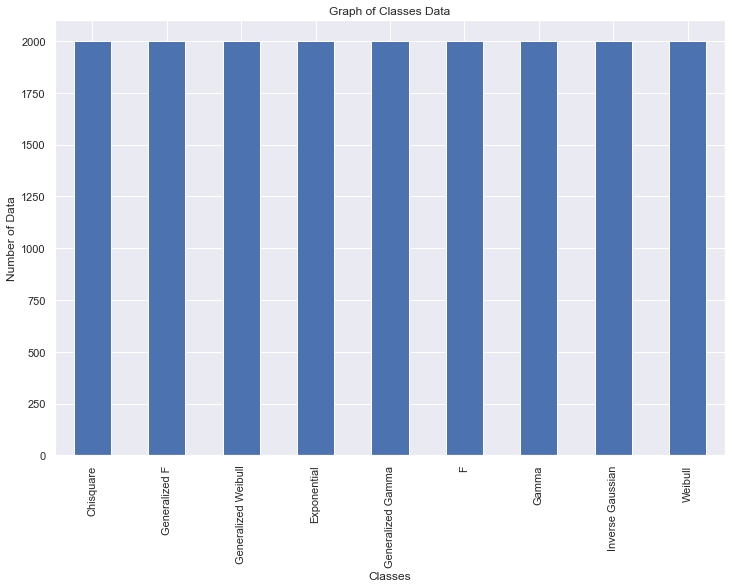

In [15]:
fig = plt.figure(figsize = (12, 8))
sns.set(style = "darkgrid")
dataset["Target"].value_counts().plot(kind = "bar")

# Labeling the Y-axis
plt.ylabel("Number of Data")

# Labeling the X-axis
plt.xlabel("Classes")

# Give a title to the graph
plt.title("Graph of Classes Data")

# Saving the plot as an image
fig.savefig("D:/Graph_relu_2HL.jpg", bbox_inches = "tight", dpi = 150);
plt.show()

### Import plot_missing_value dari jcopml

In [16]:
from jcopml.plot import plot_missing_value

,missing_value,%
Unnamed: 0,0,0.0
X1,0,0.0
X2,0,0.0
X3,0,0.0
X4,0,0.0
X5,0,0.0
X6,0,0.0
X7,0,0.0
X8,0,0.0
X9,0,0.0


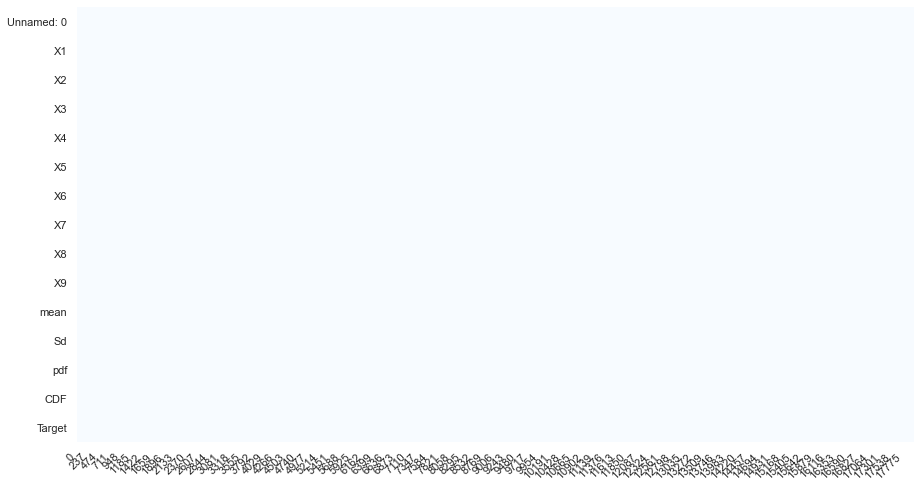

In [17]:
plot_missing_value(dataset, return_df=True)

### Import LabelEncoder dari module sklearn

In [18]:
from sklearn.preprocessing import LabelEncoder

### Menyalin / copy dataframe agar dataframe awal tetap utuh

In [19]:
dataset_int = dataset.copy()

### Membuat objek/instance yang bernama encoder

In [20]:
encoder = LabelEncoder()

### Membuat list dari nama kolom data kategori

In [21]:
categorical_data = ["Target"]

### Mengubah setiap data kategori menjadi numerik dengan encoder

In [22]:
for kolom in categorical_data:
    dataset_int[kolom] = encoder.fit_transform(dataset[kolom])

### Sekarang data sudah berupa angka sepenuhnya

In [23]:
print(f'SHAPE OF DATA FRAME dataset_int: {dataset_int.shape}')

SHAPE OF DATA FRAME dataset_int: (18000, 15)


In [24]:
dataset_int.head(450)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,mean,Sd,pdf,CDF,Target
0,1,0.562305,1.361072,0.158537,1.114719,0.345193,0.127999,1.755472,0.040238,0.144744,0.623364,0.630375,0.588851,0.607432,1
1,2,0.384407,0.003187,2.256612,0.647888,0.075514,0.325827,1.695955,2.766358,0.920136,1.008431,0.999684,0.330489,0.779674,1
2,3,0.886037,1.675818,2.627197,2.917694,1.874634,0.495568,0.550646,0.602245,0.542942,1.352531,0.952956,0.197240,0.868506,1
3,4,0.021052,0.449460,0.526025,1.309423,0.205172,0.718937,0.403984,2.337368,0.708223,0.742183,0.700292,0.492723,0.671518,1
4,5,0.037474,0.072275,0.564295,0.042283,0.489744,0.678072,0.386877,2.746147,0.394915,0.601342,0.838072,0.608628,0.594248,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,1.454909,0.744764,0.111202,0.553298,0.330695,0.588303,0.178750,0.100546,0.360805,0.491475,0.424811,0.717669,0.521554,1
446,447,0.260028,0.115305,0.491474,0.674136,0.559672,0.827936,2.403393,0.461596,0.412977,0.689613,0.675967,0.533149,0.644567,1
447,448,0.115250,0.022138,1.415829,0.065567,0.704922,0.103098,0.391668,0.773626,0.373916,0.440668,0.457467,0.774500,0.483666,1
448,449,1.107852,0.124686,0.191649,0.301138,0.278465,0.465515,0.398311,0.997451,0.420878,0.476216,0.345363,0.734284,0.510477,1


### Import TensorDataset, DataLoader dari module torch

In [25]:
from torch.utils.data import TensorDataset, DataLoader

### Import train_test_split dari module sklearn

In [26]:
from sklearn.model_selection import train_test_split

### Mengambil data tetap

In [27]:
RANDOM_SEED = 123
np.random.seed(RANDOM_SEED)

### Memisahkan dataframe awal menjadi data dan label

In [28]:
X = dataset_int.iloc[:, 1:-1].values
y = dataset_int.iloc[:, -1].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

## FEATURE SCALING

### Import MinMaxScaler dari module sklearn

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [33]:
X_train

tensor([[-0.0336, -0.0598, -0.0656,  ..., -0.0841,  1.3823,  0.5474],
        [-0.0336, -0.0597, -0.0663,  ..., -0.0845,  3.0402, -1.2867],
        [-0.0336, -0.0592, -0.0616,  ..., -0.0840,  0.6023, -0.2313],
        ...,
        [-0.0335, -0.0581, -0.0652,  ..., -0.0844,  1.9382, -0.4034],
        [-0.0306, -0.0554, -0.0568,  ..., -0.0834, -0.3787,  0.1457],
        [-0.0313, -0.0557, -0.0616,  ..., -0.0824, -0.4744, -0.0304]])

In [34]:
print(f'X_train: {X_train.shape}')

X_train: torch.Size([14400, 13])


In [35]:
print(f'y_train: {y_train.shape}')

y_train: (14400,)


In [36]:
y_train = F.one_hot(torch.LongTensor(y_train), num_classes = 9)
y_test = F.one_hot(torch.LongTensor(y_test), num_classes = 9)

In [37]:
y_train = (y_train).to(torch.float32)
y_test = (y_test).to(torch.float32)

In [38]:
print(f'X_test: {X_test.shape}')

X_test: torch.Size([3600, 13])


In [39]:
print(f'y_test: {y_test.shape}')

y_test: torch.Size([3600, 9])


In [40]:
train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size = 32, shuffle = True)

In [41]:
test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size = 32, shuffle = False)

In [42]:
iterator = iter (trainloader)

In [43]:
iterator.next()

[tensor([[-3.3278e-02, -5.7832e-02, -6.3992e-02, -6.9695e-02, -2.8226e-02,
          -4.9135e-02, -4.6074e-02, -3.9216e-02, -5.6963e-02, -1.0989e-01,
          -8.4193e-02,  6.1519e-01, -2.4709e-01],
         [-8.6552e-03,  1.0960e-02,  9.2084e-04,  1.0995e-02, -9.6336e-03,
          -1.1446e-02, -5.6308e-03, -7.1041e-03,  1.3233e-02, -1.1313e-02,
          -8.4260e-02,  1.1548e+00,  4.8226e-02],
         [-3.2786e-02, -4.7977e-02, -6.4985e-02, -7.1705e-02, -2.8556e-02,
          -4.8197e-02, -4.8196e-02, -3.8845e-02, -5.6030e-02, -1.0872e-01,
          -8.2934e-02,  8.3176e-02,  3.7785e-01],
         [-3.3609e-02, -4.8120e-02, -6.4782e-02, -6.4715e-02, -2.8162e-02,
          -4.9452e-02, -4.1980e-02, -3.6063e-02, -4.5196e-02, -1.0400e-01,
          -8.2149e-02, -5.0740e-01,  9.7539e-02],
         [-8.6383e-03,  9.8886e-03,  9.2814e-04,  1.1584e-02, -9.3419e-03,
          -1.0440e-02, -4.3884e-03, -7.5812e-03,  1.1510e-02, -1.1056e-02,
          -8.4214e-02,  1.2410e+00,  2.6621e-01],


## BANGUN ARSITEKTUR DAN CONFIG

In [44]:
class DistributionClassifier(nn.Module):
    def __init__(self, in_features, h1, h2, out_features):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)             # hidden layer
        self.out = nn.Linear(h2, out_features)   # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

### Import Callback, set_config dari module jcopdl

In [45]:
from jcopdl.callback import Callback, set_config

In [46]:
config = set_config({
    "in_features":13,
    "h1":12,
    "h2":12,
    "out_features":9
})

## TRAINING PREPARATION -> MCOC

In [47]:
model = DistributionClassifier(config.in_features, config.h1, config.h2,
                               config.out_features)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
callback = Callback(model, config, early_stop_patience = 10, outdir = "D:/Model_StandarScaler_Relu_2HL")

## TRAINING LOOPING 

### Import tqdm dari module tqdm

In [48]:
from tqdm.auto import  tqdm

In [49]:
def loop_fn(mode, dataset, dataloader, model, criterion, optimizer):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc = mode.title()):
        output = model(feature)          # feedforward
        loss = criterion(output, target)
        
        if mode == "train":
            loss.backward()
            optimizer.step()              # update weight
            optimizer.zero_grad()
            
        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target.argmax(1)).sum().item()
    cost = (cost/len(dataset))
    correct = (correct/len(dataset))
    return cost, correct

In [50]:
np.random.seed(123)

In [52]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-2.5618, -2.6317, -2.1125, -2.3840, -0.7754, -1.7775, -1.9485, -2.1305,
                       -2.3725, -1.3282, -1.2140, -0.6701, -1.1821],
                      [ 0.4826, -0.2061,  0.0719, -0.0555,  0.8214,  0.1190,  0.6139,  0.1769,
                        0.2888,  0.0666,  0.0580, -3.1715, -1.7510],
                      [-1.9965, -2.7879, -1.9671, -1.8442, -0.9051, -2.0527, -2.3569, -1.2686,
                       -2.7833, -1.8655,  0.2261,  3.2047,  1.7106],
                      [ 0.7401,  0.6786,  0.5860,  0.6429,  0.8157,  0.9495,  1.2361,  0.9694,
                        0.6903, -0.2034, -0.6838, -2.7664, -1.8102],
                      [-0.6301,  0.4297, -0.1953,  0.6362, -1.4794, -0.8657, -0.6500, -1.2443,
                        0.2528, -0.1524, -2.2573,  1.6685, -0.8345],
                      [-3.7237, -3.8153, -4.5512, -4.9377, -3.7687, -3.5730, -4.3259, -3.8961,
                       -4.8240, -4.3067, -0.0670,  0.7208

In [53]:
torch.save(model.state_dict(),"D:/weights_best.pth")

In [54]:
log = {
    "train_cost": train_cost,
    "test_cost" : test_cost,
    "train_score": train_score,
    "test_score": test_score
}
torch.save(log,"D:/Model_StandarScaler_Relu_2HL/logs.pth")

In [55]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-2.5618, -2.6317, -2.1125, -2.3840, -0.7754, -1.7775, -1.9485, -2.1305,
                       -2.3725, -1.3282, -1.2140, -0.6701, -1.1821],
                      [ 0.4826, -0.2061,  0.0719, -0.0555,  0.8214,  0.1190,  0.6139,  0.1769,
                        0.2888,  0.0666,  0.0580, -3.1715, -1.7510],
                      [-1.9965, -2.7879, -1.9671, -1.8442, -0.9051, -2.0527, -2.3569, -1.2686,
                       -2.7833, -1.8655,  0.2261,  3.2047,  1.7106],
                      [ 0.7401,  0.6786,  0.5860,  0.6429,  0.8157,  0.9495,  1.2361,  0.9694,
                        0.6903, -0.2034, -0.6838, -2.7664, -1.8102],
                      [-0.6301,  0.4297, -0.1953,  0.6362, -1.4794, -0.8657, -0.6500, -1.2443,
                        0.2528, -0.1524, -2.2573,  1.6685, -0.8345],
                      [-3.7237, -3.8153, -4.5512, -4.9377, -3.7687, -3.5730, -4.3259, -3.8961,
                       -4.8240, -4.3067, -0.0670,  0.7208

## LOAD MODEL 

In [56]:
weight = torch.load("D:/weights_best.pth", map_location = "cpu")
config = torch.load("D:/configs.pth", map_location = "cpu")
model = DistributionClassifier(config.in_features, config.h1, config.h2,config.out_features)
model.load_state_dict(weight)

<All keys matched successfully>

## PREDICTION

In [57]:
with torch.no_grad():
        model.eval()
        output = model(X_test) 
        pred = output.argmax(1)
pred

tensor([0, 6, 8,  ..., 3, 2, 0])

## ACCURACY DAN CONFUSION MATRIX

### Import confusion_matrix, accuracy_score dari module sklearn

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

In [59]:
accuracy_score(y_test.argmax(1),pred)

0.9980555555555556

In [60]:
cm = confusion_matrix(y_test.argmax(1),pred)
cm

array([[420,   0,   0,   0,   0,   0,   0,   2,   0],
       [  0, 419,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 382,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 394,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1, 390,   2,   0,   0,   0],
       [  0,   0,   0,   0,   0, 402,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 384,   0,   0],
       [  1,   0,   1,   0,   0,   0,   0, 388,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 414]], dtype=int64)

In [61]:
rmse = mean_squared_error(y_test.argmax(1),pred, squared = False)
rmse

0.22047927592204922

## PLOT CONFUSION MATRIX

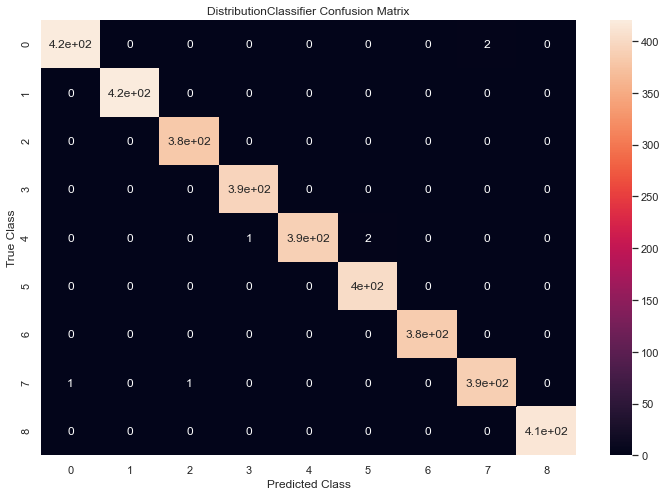

In [62]:
fig = plt.figure(figsize = (12,8))
sns.heatmap(cm, annot = True)

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("DistributionClassifier Confusion Matrix")

# Saving the plot as an image
fig.savefig("D:/confusion_matrix_relu_2HL.jpg", bbox_inches = "tight", dpi = 150)
plt.show()